# Insurance Cost Predicition



In [23]:
! pip install opendatasets --upgrade --quiet

You should consider upgrading via the 'C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Flow of Project
1.Dowmload the dataset from kaggle
2.Clean the data includes(removing null values and dupilacate values)
3.Perform EDA
4.Perform ML
5.Train Test your model
6.Compare ypur models

Downloading data from kaggle 

In [3]:
dataset_url='https://www.kaggle.com/datasets/annetxu/health-insurance-cost-prediction'

In [4]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\health-insurance-cost-prediction" (use force=True to force download)


In [5]:
data_dir = 'health-insurance-cost-prediction'

In [6]:
import os
os.listdir(data_dir)

['insurance.csv']

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
df=pd.read_csv(data_dir + '/insurance.csv')


Expoloratory Data Analysis


In [9]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
df.duplicated().sum()

1

In [14]:
df.shape


(1338, 7)

In [15]:
du=df[df.duplicated().values]
du

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [16]:
df.drop([581],axis = 0,inplace = True)

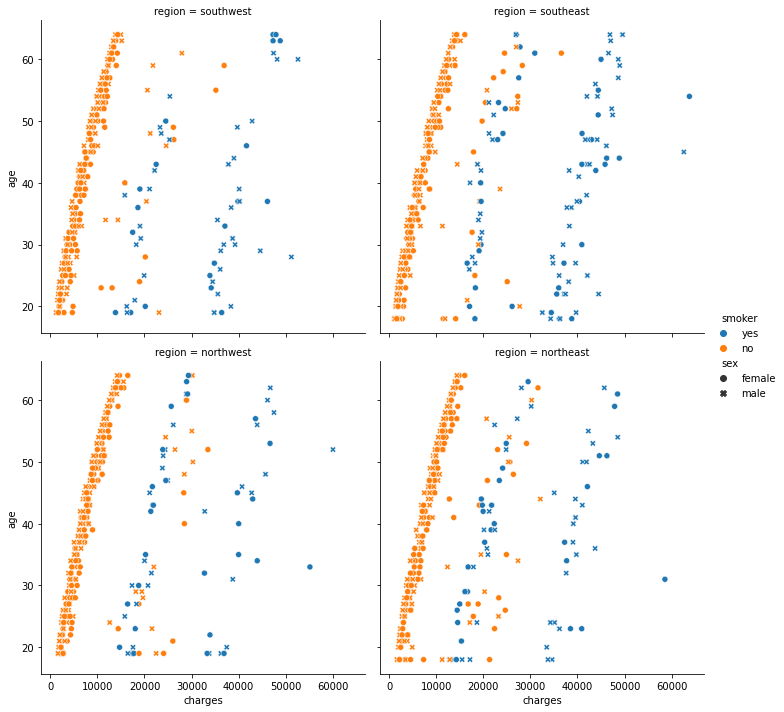

In [17]:
sns.relplot(data=df,x="charges",y="age",hue="smoker",col="region",style="sex",col_wrap=2)

In [18]:
sns.set(rc={"figure.figsize":(10, 10)})

<AxesSubplot:xlabel='smoker', ylabel='charges'>

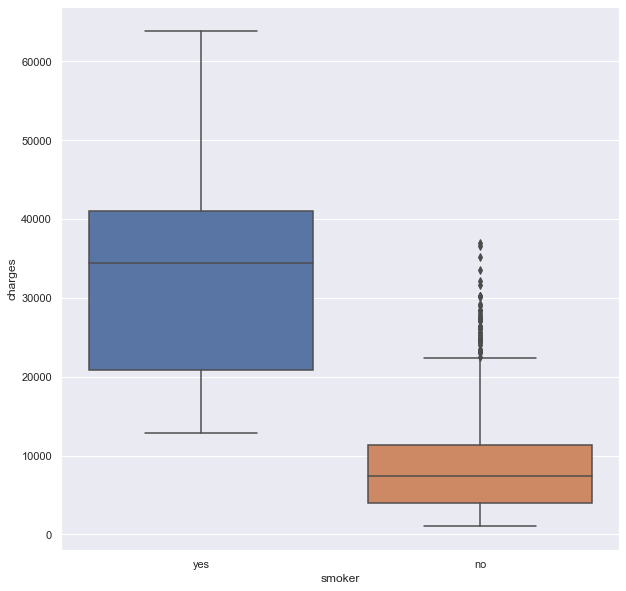

In [19]:
sns.boxplot(data=df,x="smoker",y ="charges")

<AxesSubplot:xlabel='charges', ylabel='bmi'>

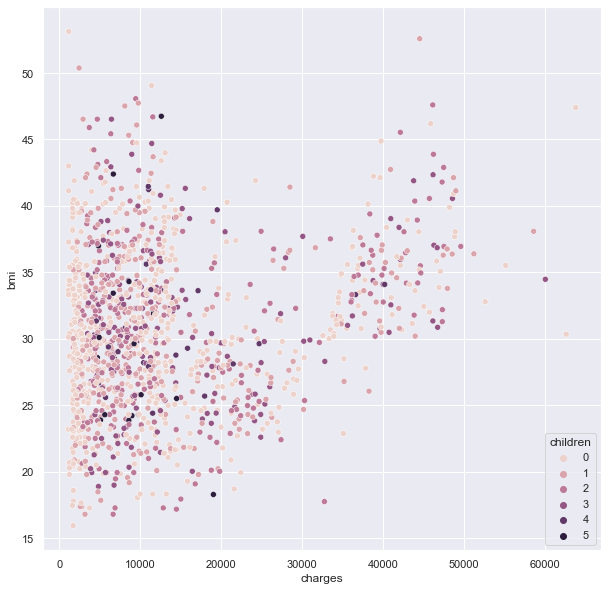

In [20]:
sns.scatterplot(data=df,x="charges",y="bmi",hue="children")

list of some outliers and then droping them

In [21]:
df.loc[df.charges>50000]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [22]:
df.drop([34,577,819,1146,1230],axis = 0,inplace = True)

ML starts here

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

Encoding the data (converting catogorical data to numerical values)

In [29]:
df.replace({'sex':{'male':1,'female':0}},inplace=True)
df.replace({'smoker':{'yes':1,'no':0}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

In [30]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


Splitting the data set Training the model and getting the score

In [37]:
X=df.drop(columns='charges',axis=1)
y=df.charges

In [38]:
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=0)

In [39]:
reg = GradientBoostingRegressor(random_state=0)

In [40]:
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [41]:
reg.predict(X_test[1:2])

array([14841.02502766])

In [42]:
reg.score(X_test, y_test)

0.8708025112835202

In [45]:
o=reg.predict(X_test)

In [48]:
o

array([ 3780.53515036, 14841.02502766,  8172.66283552, 45522.74358836,
       14705.46636012, 23124.55645161,  3738.70054542,  8402.44436629,
       11708.52058624, 11480.95147519,  9761.96164689, 13373.99286717,
        4366.72223496,  2927.64509574,  6648.11609629,  3273.27218639,
       18467.73137508,  9009.60791052,  7362.51251037, 37984.81849382,
        3362.71207735,  6590.2480791 , 10268.5774305 ,  3929.02948273,
       46289.85988323,  8194.79599831,  2932.05841069,  8201.0064954 ,
        6972.84351747,  6885.59378768, 11570.78221485, 48192.79676718,
       20012.57914037, 13929.13591414, 10438.7498769 , 20641.9599102 ,
        7014.05573916, 35955.17761644,  3976.41805531,  8169.1330351 ,
       10171.69952855, 41176.00864835, 37256.92241174,  7188.23575996,
        4137.44739809, 11843.54217583, 15204.19776651, 45874.95605858,
        5747.94345706, 48513.5403395 ,  8065.02476552,  9866.82685806,
       48277.9071413 , 14790.12586339, 10564.84592616, 13776.4938846 ,
      